<a href="https://colab.research.google.com/github/riyabhatnagar021/Movie_Genre_Predeiction/blob/master/Movie_Genre_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from zipfile import ZipFile
file='drive/My Drive/project_data/Multi_Label_dataset.zip'
with ZipFile(file,'r') as zip:
  zip.extractall()
  print('done')


done


In [0]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K
from keras.preprocessing import image
from tqdm import tqdm

Using TensorFlow backend.


In [0]:
import pandas as pd

In [0]:
data=pd.read_csv('Multi_Label_dataset/train.csv',nrows=6000)
data.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [0]:

data.shape

(6000, 27)

In [0]:
import numpy as np

In [0]:
dataimg=[]

for i in tqdm (range(data.shape[0])):
  
  img=image.load_img('Multi_Label_dataset/Images/'+data['Id'][i]+'.jpg',target_size=(400,400,3))
  img=image.img_to_array(img)
  img=img/255
  dataimg.append(img)
  
  
  
X=np.array(dataimg)
  
  


100%|██████████| 6000/6000 [00:25<00:00, 239.45it/s]


In [0]:
X.shape

(6000, 400, 400, 3)

In [0]:
import matplotlib.pyplot as plt

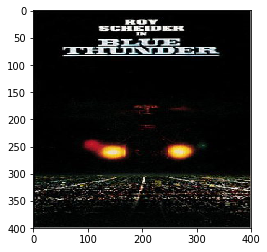

In [0]:
im=X[14]
plt.imshow(im)

In [0]:
y=np.array(data.drop(['Genre','Id'],axis=1))
y.shape
           

(6000, 25)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

NameError: ignored

In [0]:
X_train=X[:5400]
y_train=y[:5400]

In [0]:
X_test=X[5401:6000]
y_test=y[5401:6000]

In [0]:
X_test.shape

(599, 400, 400, 3)

In [0]:
model=Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(400,400,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(25,activation='sigmoid'))


W0905 18:52:09.059001 139724650063744 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3733: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 398, 398, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 199, 199, 16)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 199, 199, 16)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 197, 197, 32)      4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 98, 98, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 96, 96, 64)       

In [0]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
model.fit(X_train,y_train,epochs=20,batch_size=32,validation_data=(X_test,y_test))

Train on 5400 samples, validate on 599 samples
Epoch 1/20
5400/5400 [==============================] - 39s 7ms/step - loss: 0.2382 - acc: 0.9112 - val_loss: 0.2420 - val_acc: 0.9071
Epoch 2/20
5400/5400 [==============================] - 39s 7ms/step - loss: 0.2374 - acc: 0.9120 - val_loss: 0.2424 - val_acc: 0.9081
Epoch 3/20
5400/5400 [==============================] - 39s 7ms/step - loss: 0.2371 - acc: 0.9119 - val_loss: 0.2423 - val_acc: 0.9087
Epoch 4/20
5400/5400 [==============================] - 39s 7ms/step - loss: 0.2359 - acc: 0.9124 - val_loss: 0.2444 - val_acc: 0.9066
Epoch 5/20
5400/5400 [==============================] - 39s 7ms/step - loss: 0.2340 - acc: 0.9135 - val_loss: 0.2449 - val_acc: 0.9074
Epoch 6/20
5400/5400 [==============================] - 39s 7ms/step - loss: 0.2330 - acc: 0.9137 - val_loss: 0.2423 - val_acc: 0.9096
Epoch 7/20
5400/5400 [==============================] - 39s 7ms/step - loss: 0.2323 - acc: 0.9145 - val_loss: 0.2378 - val_acc: 0.9113
Epoch 8/

In [0]:
a1='dk.jpg'
img = image.load_img(a1,target_size=(400,400,3))
img = image.img_to_array(img)
img = img/255

[:-4:-1] it means last 3 feartures are preserved

Drama (0.594)
Action (0.429)
Crime (0.416)


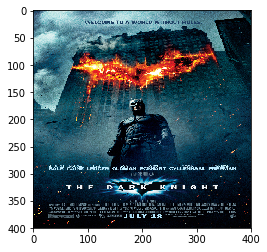

In [0]:
classes = np.array(data.columns[2:])
proba = model.predict(img.reshape(1,400,400,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [0]:
data['Genre'].unique

<bound method Series.unique of 0                       ['Comedy', 'Drama']
1             ['Drama', 'Romance', 'Music']
2                                ['Comedy']
3                    ['Sci-Fi', 'Thriller']
4       ['Action', 'Adventure', 'Thriller']
5                    ['Action', 'Thriller']
6             ['Drama', 'Music', 'Romance']
7                       ['Comedy', 'Drama']
8              ['Comedy', 'Crime', 'Drama']
9                   ['Adventure', 'Comedy']
10           ['Action', 'Comedy', 'Sci-Fi']
11                      ['Comedy', 'Drama']
12      ['Action', 'Adventure', 'Thriller']
13                               ['Horror']
14             ['Action', 'Crime', 'Drama']
15          ['Drama', 'Musical', 'Romance']
16        ['Biography', 'Drama', 'History']
17           ['Crime', 'Horror', 'Mystery']
18                               ['Comedy']
19          ['Action', 'Drama', 'Thriller']
20                   ['Adventure', 'Drama']
21                     ['Horror', 'Sci-Fi']
2